In [184]:
# https://medium.com/@abhash-rai/poisson-process-simulation-and-analysis-in-python-e62f69d1fdd0
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_poisson_events(rate_lamda, time_duration_n):
    num_events_k = np.random.poisson(rate_lamda * time_duration_n) #get k given np
    event_times = np.sort(np.random.uniform(0, time_duration_n, num_events_k)) #detect an event between 0 to n for k times
    inter_arrival_times = np.diff(event_times)
    return num_events_k, event_times, inter_arrival_times

In [236]:
rate_lamda = 3 # Example rate
time_duration_n = 500  # Example time duration

num_events_k, event_times, inter_arrival_times = generate_poisson_events(rate_lamda, time_duration_n)

print("Number of events k:", num_events_k)
print("Event times:", event_times)
print("Inter-arrival times:", inter_arrival_times)
P_k = np.exp(-rate_lamda*time_duration_n) * (rate_lamda*time_duration_n)**(num_events_k) / math.factorial(num_events_k)
print(f"P of {num_events_k} occurance given lamda={rate_lamda} and time={time_duration_n} is {P_k}")

Number of events k: 1443
Event times: [1.38876048e-01 3.60598278e-01 4.32101470e-01 ... 4.98556912e+02
 4.99013468e+02 4.99807246e+02]
Inter-arrival times: [0.22172223 0.07150319 0.17212612 ... 0.08367046 0.45655618 0.79377769]


OverflowError: int too large to convert to float

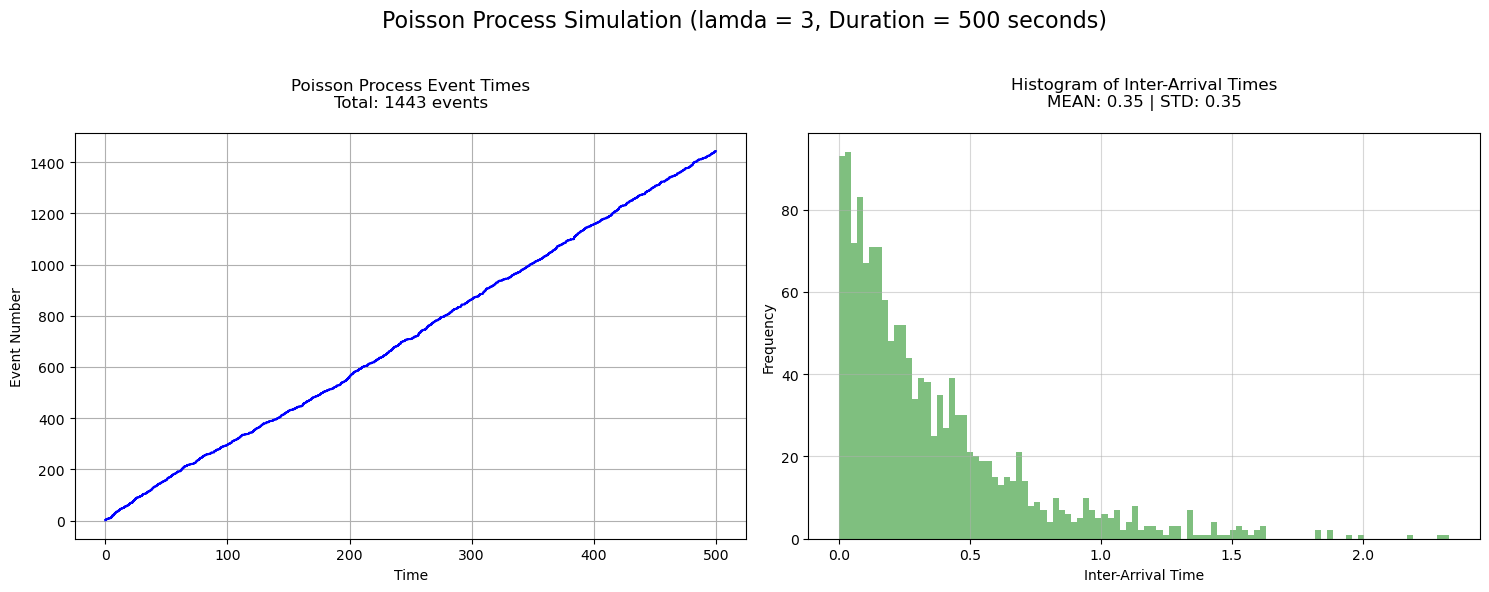

In [246]:
def plot_non_sequential_poisson(num_events_k, event_times, inter_arrival_times, rate_lamda, time_duration_n):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Poisson Process Simulation (lamda = {rate_lamda}, Duration = {time_duration_n} seconds)\n', fontsize=16)

    axs[0].step(event_times, np.arange(1, num_events_k + 1), where='post', color='blue')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Event Number')
    axs[0].set_title(f'Poisson Process Event Times\nTotal: {num_events_k} events\n')
    axs[0].grid(True)

    axs[1].hist(inter_arrival_times, bins=100, color='green', alpha=0.5)
    axs[1].set_xlabel('Inter-Arrival Time')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Inter-Arrival Times\nMEAN: {np.mean(inter_arrival_times):.2f} | STD: {np.std(inter_arrival_times):.2f}\n')
    axs[1].grid(True, alpha=0.5)
    
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_non_sequential_poisson(num_events_k, event_times, inter_arrival_times, rate_lamda, time_duration_n)

In [258]:
def plot_sequential_poisson(num_events_list, event_times_list, inter_arrival_times_list, rate_lamda, time_duration_n):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Poisson Process Simulation (Duration = {time_duration_n} seconds)\n', fontsize=16)

    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Event Number')
    axs[0].set_title(f'Poisson Process Event Times')
    axs[0].grid(True)

    axs[1].set_xlabel('Inter-Arrival Time')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Inter-Arrival Times')
    axs[1].grid(True, alpha=0.5)

    color_palette = plt.get_cmap('tab20')
    colors = [color_palette(i) for i in range(len(rate_lamda))]

    for n, individual_rate in enumerate(rate_lamda):
        num_events_k = num_events_list[n]
        event_times = event_times_list[n]
        inter_arrival_times = inter_arrival_times_list[n]

        axs[0].step(event_times, np.arange(1, num_events_k + 1), where='post', color=colors[n], label=f'λ = {individual_rate}, Total Events: {num_events_k}')
        axs[1].hist(inter_arrival_times, bins=20, color=colors[n], alpha=0.5, label=f'λ = {individual_rate}, MEAN: {np.mean(inter_arrival_times):.2f}, STD: {np.std(inter_arrival_times):.2f}')

    axs[0].legend()
    axs[1].legend()

    plt.tight_layout()
    plt.show()

num_events_list = [1,3,5,8,10]
event_times_list = [10]
plot_sequential_poisson(num_events_list, event_times_list, inter_arrival_times_list, rate_lamda, time_duration_m)

NameError: name 'inter_arrival_times_list' is not defined

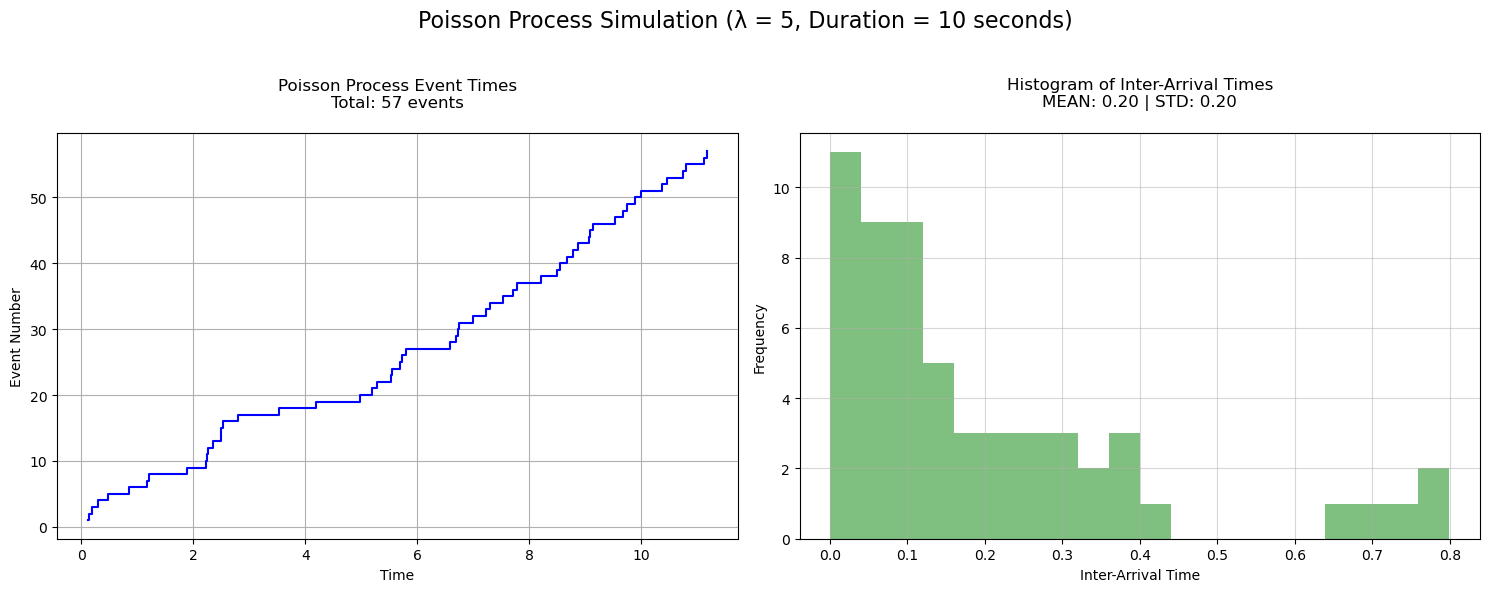

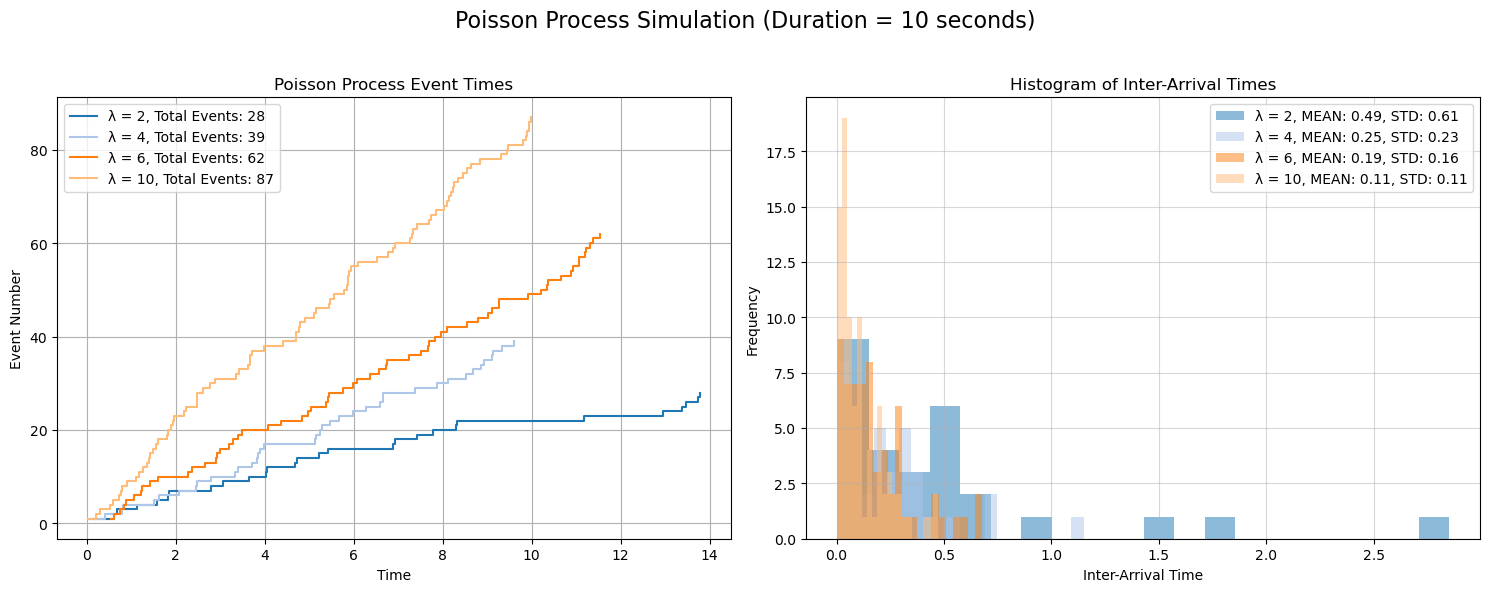

In [254]:
import numpy as np
import matplotlib.pyplot as plt

def generate_poisson_events(rate, time_duration):
    num_events = np.random.poisson(rate * time_duration)
    inter_arrival_times = np.random.exponential(1.0 / rate, num_events)
    event_times = np.cumsum(inter_arrival_times)
    return num_events, event_times, inter_arrival_times

def plot_non_sequential_poisson(num_events, event_times, inter_arrival_times, rate, time_duration):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Poisson Process Simulation (λ = {rate}, Duration = {time_duration} seconds)\n', fontsize=16)

    axs[0].step(event_times, np.arange(1, num_events + 1), where='post', color='blue')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Event Number')
    axs[0].set_title(f'Poisson Process Event Times\nTotal: {num_events} events\n')
    axs[0].grid(True)

    axs[1].hist(inter_arrival_times, bins=20, color='green', alpha=0.5)
    axs[1].set_xlabel('Inter-Arrival Time')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Inter-Arrival Times\nMEAN: {np.mean(inter_arrival_times):.2f} | STD: {np.std(inter_arrival_times):.2f}\n')
    axs[1].grid(True, alpha=0.5)
    
    plt.tight_layout()
    plt.show()

def plot_sequential_poisson(num_events_list, event_times_list, inter_arrival_times_list, rate, time_duration):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Poisson Process Simulation (Duration = {time_duration} seconds)\n', fontsize=16)

    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Event Number')
    axs[0].set_title(f'Poisson Process Event Times')
    axs[0].grid(True)

    axs[1].set_xlabel('Inter-Arrival Time')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Inter-Arrival Times')
    axs[1].grid(True, alpha=0.5)

    color_palette = plt.get_cmap('tab20')
    colors = [color_palette(i) for i in range(len(rate))]

    for n, individual_rate in enumerate(rate):
        num_events = num_events_list[n]
        event_times = event_times_list[n]
        inter_arrival_times = inter_arrival_times_list[n]

        axs[0].step(event_times, np.arange(1, num_events + 1), where='post', color=colors[n], label=f'λ = {individual_rate}, Total Events: {num_events}')
        axs[1].hist(inter_arrival_times, bins=20, color=colors[n], alpha=0.5, label=f'λ = {individual_rate}, MEAN: {np.mean(inter_arrival_times):.2f}, STD: {np.std(inter_arrival_times):.2f}')

    axs[0].legend()
    axs[1].legend()

    plt.tight_layout()
    plt.show()

def poisson_simulation(rate, time_duration, show_visualization=True):
    if isinstance(rate, int):
        num_events, event_times, inter_arrival_times = generate_poisson_events(rate, time_duration)
        
        if show_visualization:
            plot_non_sequential_poisson(num_events, event_times, inter_arrival_times, rate, time_duration)
        else:
            return num_events, event_times, inter_arrival_times

    elif isinstance(rate, list):
        num_events_list = []
        event_times_list = []
        inter_arrival_times_list = []

        for individual_rate in rate:
            num_events, event_times, inter_arrival_times = generate_poisson_events(individual_rate, time_duration)
            num_events_list.append(num_events)
            event_times_list.append(event_times)
            inter_arrival_times_list.append(inter_arrival_times)

        if show_visualization:
            plot_sequential_poisson(num_events_list, event_times_list, inter_arrival_times_list, rate, time_duration)
        else:
            return num_events_list, event_times_list, inter_arrival_times_list

# Example usage
poisson_simulation(rate=5, time_duration=10) # For single lambda rate (non-sequential)
poisson_simulation(rate=[2, 4, 6, 10], time_duration=10) # For multiple lambda rate (sequential)